c:\users\neeraj bafila\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  


Spam % is  13.406317300789663
y_pridict  [0 0 0 ... 0 1 0]
accuracy_score is  0.9770279971284996
confusion_matrix is  [[1207    1]
 [  31  154]]
auc score is 0.9967692858421334
roc_auc_score is  0.915802308931448


Text(0.5, 1.0, 'ROC')

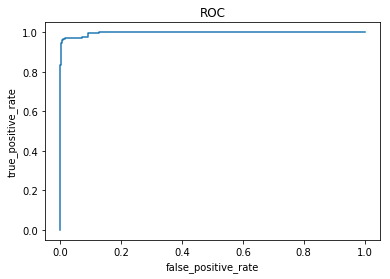

In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

docs = pd.read_table('SMSSpamCollection+(1)', header=None, names=['Class', 'SMS'])

#docs.head()

docs['Class'].unique()

ham_spam = docs['Class'].value_counts()

print("Spam % is ",(ham_spam[1]/float(ham_spam[0]+ham_spam[1]))*100)

#docs.head(3)

docs['label'] = docs['Class'].map({'ham':0, 'spam':1})

docs.head()

X = docs['SMS']

y = docs['label']

# print(X.shape)

# y.shape

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

# X_train.head()

# y_train.head()

from sklearn.feature_extraction.text import CountVectorizer 

cvr = CountVectorizer(stop_words='english')

cvr.fit(X_train)

X_train_transform = cvr.transform(X_train)

#print(X_train_transform)

# X_train_transform_metrics = X_train_transform.toarray()

# #cvr.vocabulary_

# #cvr.get_feature_names()

# df_bag = pd.DataFrame(X_train_transform_metrics, columns=cvr.get_feature_names())
# print(df_bag.columns)

X_test_transform = cvr.transform(X_test)

from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()

bnb.fit(X_train_transform, y_train)

y_pridict = bnb.predict(X_test_transform)

print('y_pridict ', y_pridict)

y_prob_pridict = bnb.predict_proba(X_test_transform)

#y_prob_pridict

from sklearn.metrics import accuracy_score, confusion_matrix

print('accuracy_score is ', accuracy_score(y_test, y_pridict))

print('confusion_matrix is ', confusion_matrix(y_test, y_pridict))

from sklearn.metrics import roc_curve, auc, roc_auc_score

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob_pridict[:,1])

auc_score = auc(false_positive_rate, true_positive_rate)

print('auc score is', auc_score)

print('roc_auc_score is ',roc_auc_score(y_test, y_pridict))

false_positive_rate

true_positive_rate

thresholds

%matplotlib inline
plt.plot(false_positive_rate, true_positive_rate)
plt.xlabel("false_positive_rate")
plt.ylabel("true_positive_rate")
plt.title('ROC')